In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cifar10=keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
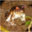

In [ ]:
x_train[0]

In [ ]:
y_train[0]

array([6], dtype=uint8)

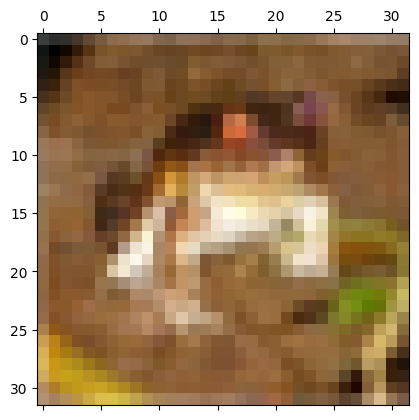

In [ ]:
plt.matshow(x_train[0])

**Normalize training data before training the neural net**

In [ ]:
x_train=x_train/255

In [ ]:
x_test=x_test/255

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(512,activation="relu"))
model.add(Dense(128,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               1573376   
                                                                 
 dense_16 (Dense)            (None, 128)               65664     
                                                                 
Total params: 1639040 (6.25 MB)
Trainable params: 1639040 (6.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train)

1563/1563 [==============================] - 35s 22ms/step - loss: 1.9152 - accuracy: 0.3221


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.7658 - accuracy: 0.3648


[1.765793800354004, 0.36480000615119934]

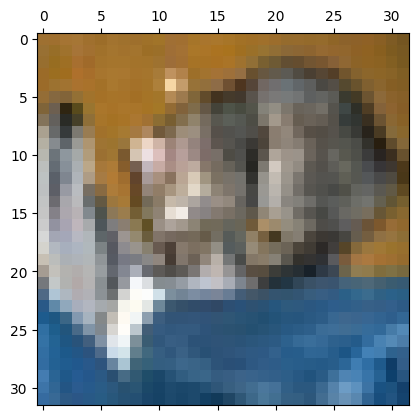

In [ ]:
plt.matshow(x_test[0])

In [ ]:
yp=model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [ ]:
np.argmax(yp[0])

2

In [ ]:
class_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
class_labels[np.argmax(yp[0])]

'bird'